## Desafío - Dimensionalidad y Agrupación (I)
### Camila Vera Villa - lunes 05 de agosto

##### Contexto
Para esta actividad utilizaremos un subconjunto de 25 items de la International Personality Item
Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características Amabilidad,Escrupolisidad, Extroversión, Neuroticismo, Apertura 

Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:

    1: No me representa para nada.
    2: No me representa.
    3: Algunas cosas no me representan.
    4: Algunas cosas me representan.
    5: Me representa.
    6: Me representa completamente. 
    

##### Las 25 preguntas son:
- A1 Soy indiferente a los sentimientos de otros.
- A2 Me preocupo del bienestar de otros.
- A3 Sé cómo confortar a otros.
- A4 Me agradan los niños.
- A5 Hago sentir tranquila a la gente.

- C1 Soy exacto en mi trabajo.
- C2 Sigo con mis tareas hasta que todo esté perfecto.
- C3 Hago cosas siguiendo un plan.
- C4 Hago cosas con el mínimo esfuerzo.
- C5 Pierdo mi tiempo.

- E1 No hablo mucho con las personas.
- E2 Me es dificil acercarme a otros.
- E3 Sé cómo cautivar gente.
- E4 Hago amigos de forma fácil.
- E5 Puedo tomar el cargo de las cosas.

- N1 Me enojo con facilidad.
- N2 Me irrito con facilidad.
- N3 Tengo cambios de humor frecuentes.
- N4 Usualmente me siento melancólico.
- N5 Entro en pánico con facilidad.

- O1 Estoy lleno de ideas.
- O2 Evito leer material difícil.
- O3 Tiendo a llevar la conversación a niveles más altos.
- O4 Dedico tiempo a la reflexión de cosas.
- O5 No profundizaré sobre una materia específica.


Se registraron una serie de covariables sobre características demográficas de los encuestados:
* **gender:**
    
    Hombre = 1
    
    Mujer =2
    
    
* **education:**

   1 = Educación Media Incompleta
   
   2 = Educación Media Completa
   
   3 = Educación Universitaria Incompleta
   
   4 = Educación Universitaria Completa 
   
   5 = Estudios de Postgrado.
   
     
* **age**: 

    Edad en años

Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos.

### Desafío 1: Lectura de archivos

Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
* Importe la base de datos bfi.csv y asígnela a un objeto df.
* Solicite las primeras 5 observaciones con head.

In [72]:
# librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#statmodels para generar modelos de regresio
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

#sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

from copy import copy
import missingno as msngo

# graficos
plt.style.use('seaborn') 
plt.rcParams["figure.figsize"] = (20, 20) # Tamaño 
plt.rcParams["figure.dpi"] = 100 # resolución

In [90]:
#carga del data set y limpieza index
df=pd.read_csv('bfi.csv')

df.head(200)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
5,61623,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
6,61624,2.0,5.0,5.0,3.0,5.0,5.0,4.0,4.0,2.0,...,1.0,1.0,5.0,2,5.0,6.0,1.0,1,NaN,18
7,61629,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
8,61630,4.0,3.0,6.0,3.0,3.0,6.0,6.0,3.0,4.0,...,3.0,3.0,6.0,6,6.0,6.0,1.0,1,1.0,19
9,61633,2.0,5.0,6.0,6.0,5.0,6.0,5.0,6.0,2.0,...,2.0,4.0,5.0,1,5.0,5.0,2.0,2,NaN,17


In [74]:
df_clean = copy(df).dropna()

In [75]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### Desafío 2: Preprocesamiento

* Elimine las columnas redundantes de la base, tal como 'Unnamed: 0' .
* Analice el patrón de datos perdidos con **missingno.** 
* Comente cuáles son las principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [76]:
from copy import copy
df_clean = copy(df).dropna()

In [77]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [78]:
df.drop(df.columns[[0]], axis=1, inplace=True) # eliminar la primera columna

In [79]:
df.shape

(2800, 28)

In [80]:
df.isnull().sum()

A1            16
A2            27
A3            26
A4            19
A5            16
C1            21
C2            24
C3            20
C4            26
C5            16
E1            23
E2            16
E3            25
E4             9
E5            21
N1            22
N2            21
N3            11
N4            36
N5            29
O1            22
O2             0
O3            28
O4            14
O5            20
gender         0
education    223
age            0
dtype: int64

<Figure size 400x400 with 0 Axes>

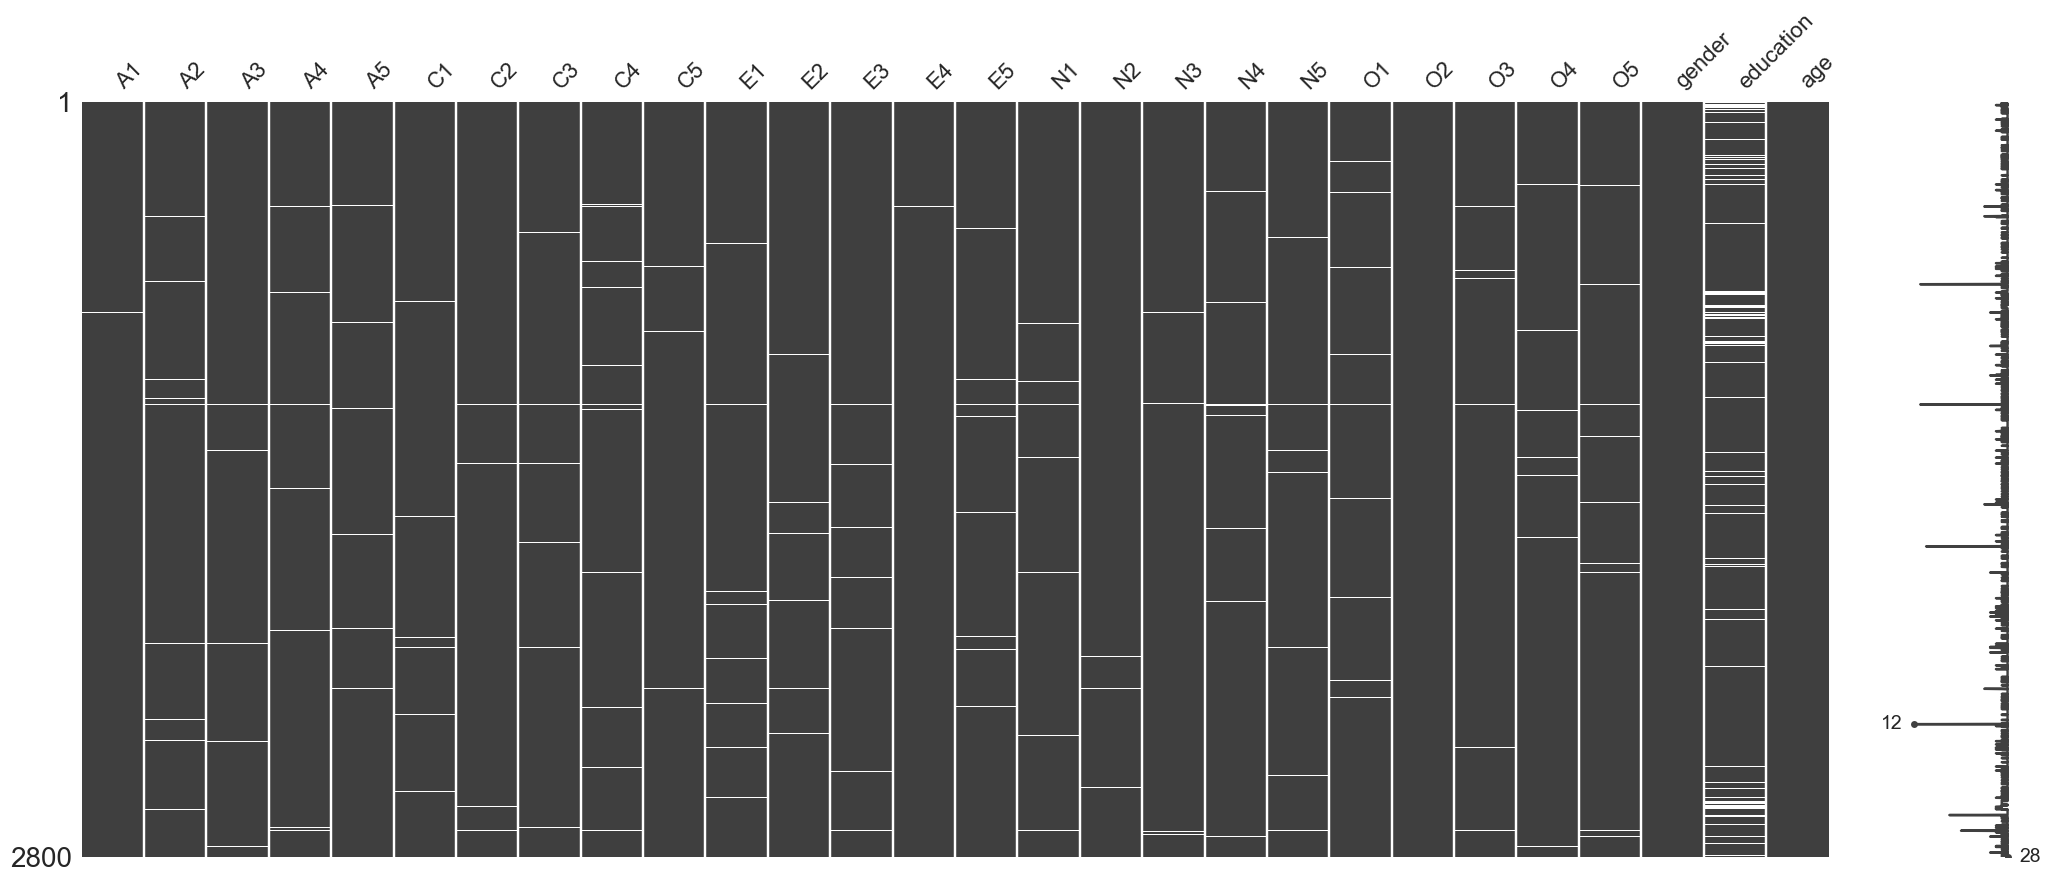

In [81]:
plt.figure(figsize=(4,4))
msngo.matrix(df);

In [82]:
dfm = df.dropna(how="any")

In [83]:
dfm.shape

(2236, 28)

Las variables que presentan mayor cantidad  de datos perdidos, según el conteo  grafico de msngo es 'education'  y las respuestas del cuestionario, tienen en general 20 datos perdidos como promedio; las variables de genero y edad no tienen datos perdidos. 

### Desafío 3: Descripción
* Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
* Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con **heatmap**
* Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [84]:
#separacion df con las preguntas a extraer
dfm_p=dfm.loc[:,['A1', 'A2', 'A3','A4','A5','C1','C2','C3','C4','C5','E1','E2','E3','E4','E5','N1','N2','N3','N4','N5','O1', 'O2', 'O3', 'O4',
       'O5']]

In [85]:
dfm_p.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

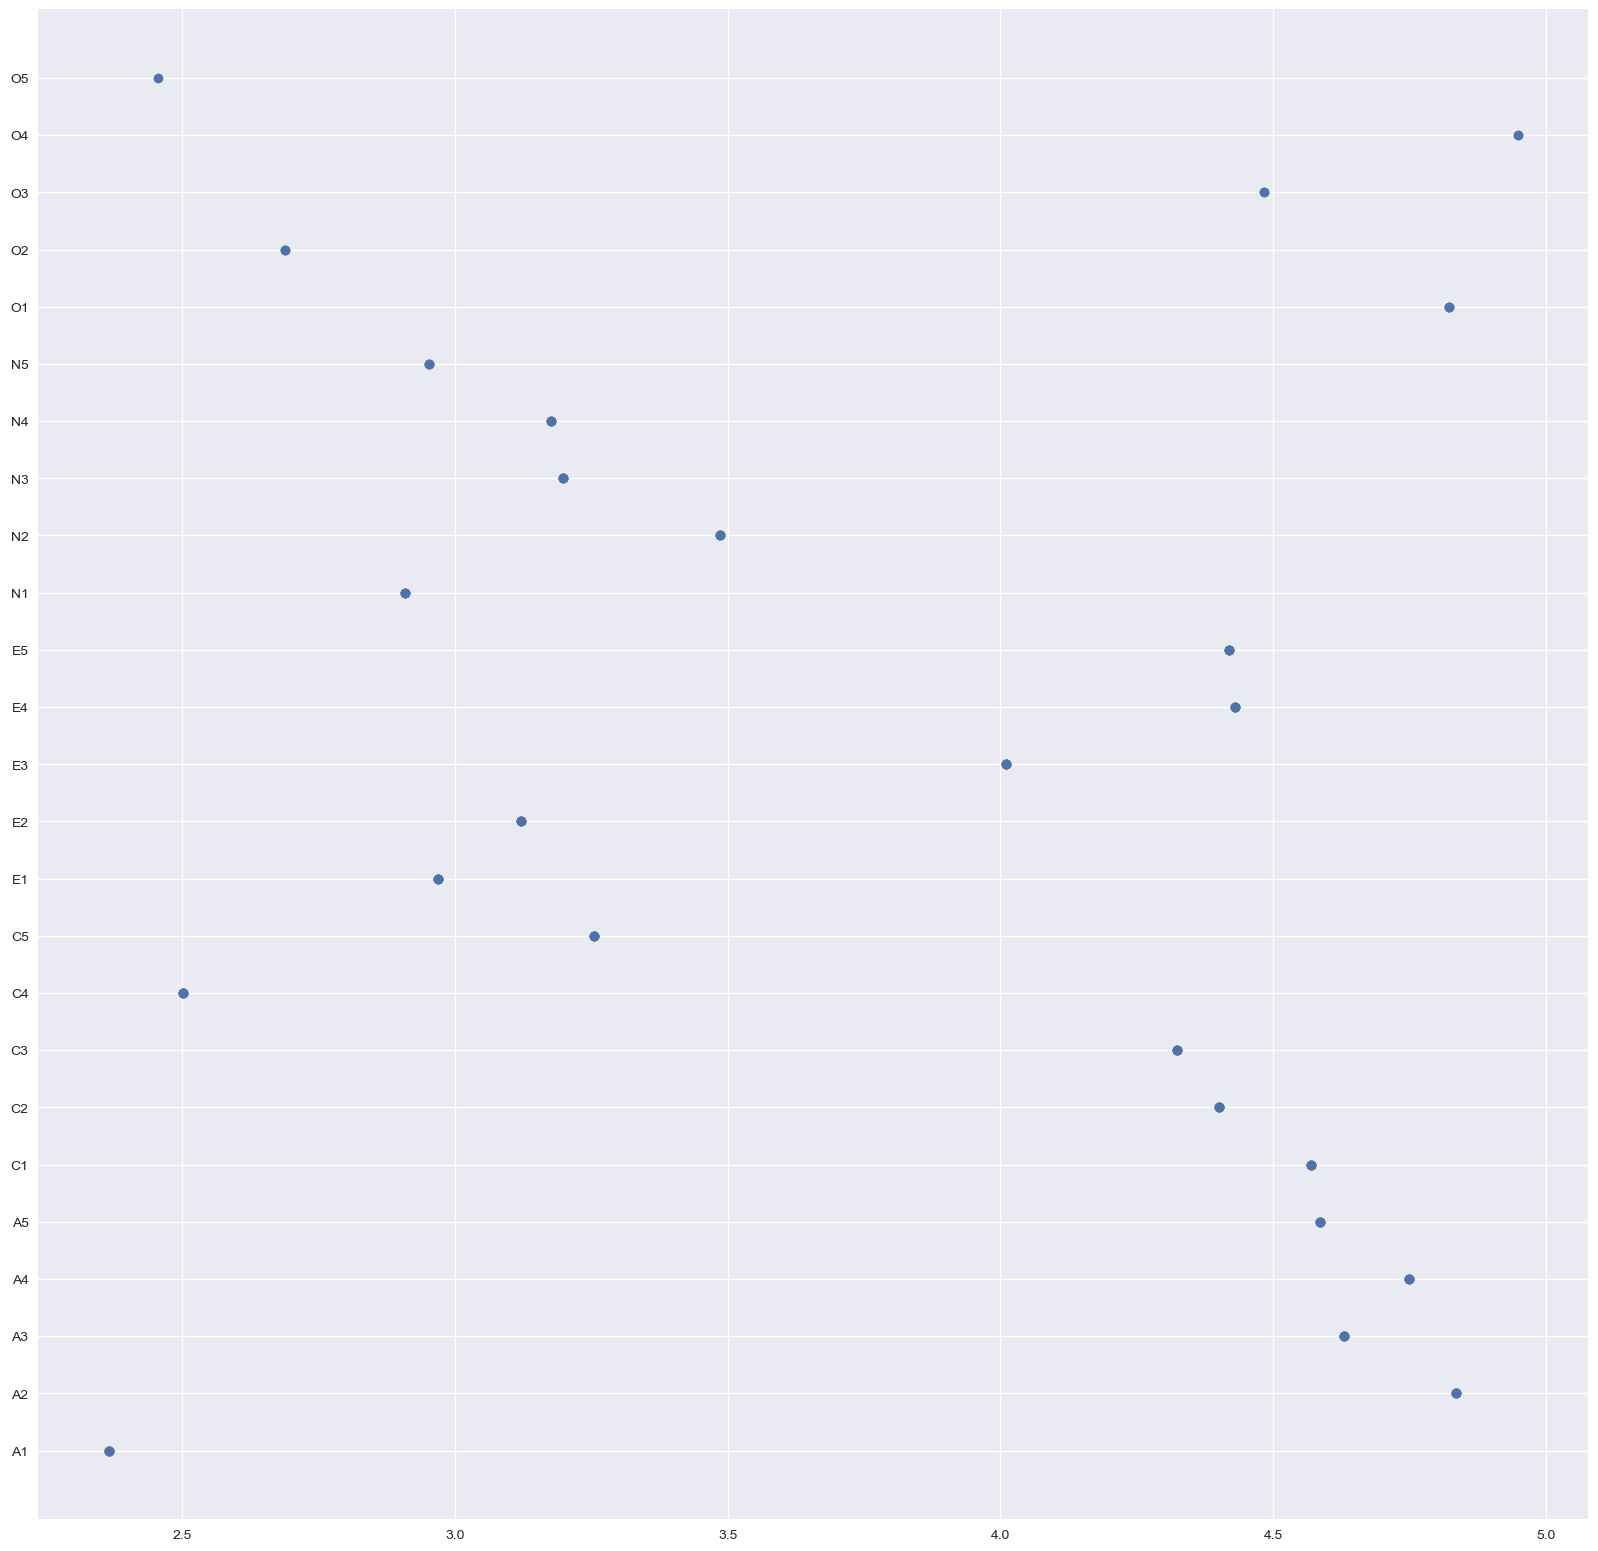

In [86]:
#reporte de medias para cada pregunta de la bateria.
variable, mean = [], []
for colname, serie in dfm_p.iteritems():
    variable.append(colname)
    mean.append(serie.mean())
    tmp_df = pd.DataFrame({
        'var': variable,
        'mean': mean
    }).sort_values(by=['mean'])
    plt.plot(tmp_df['mean'], tmp_df['var'], 'o',)

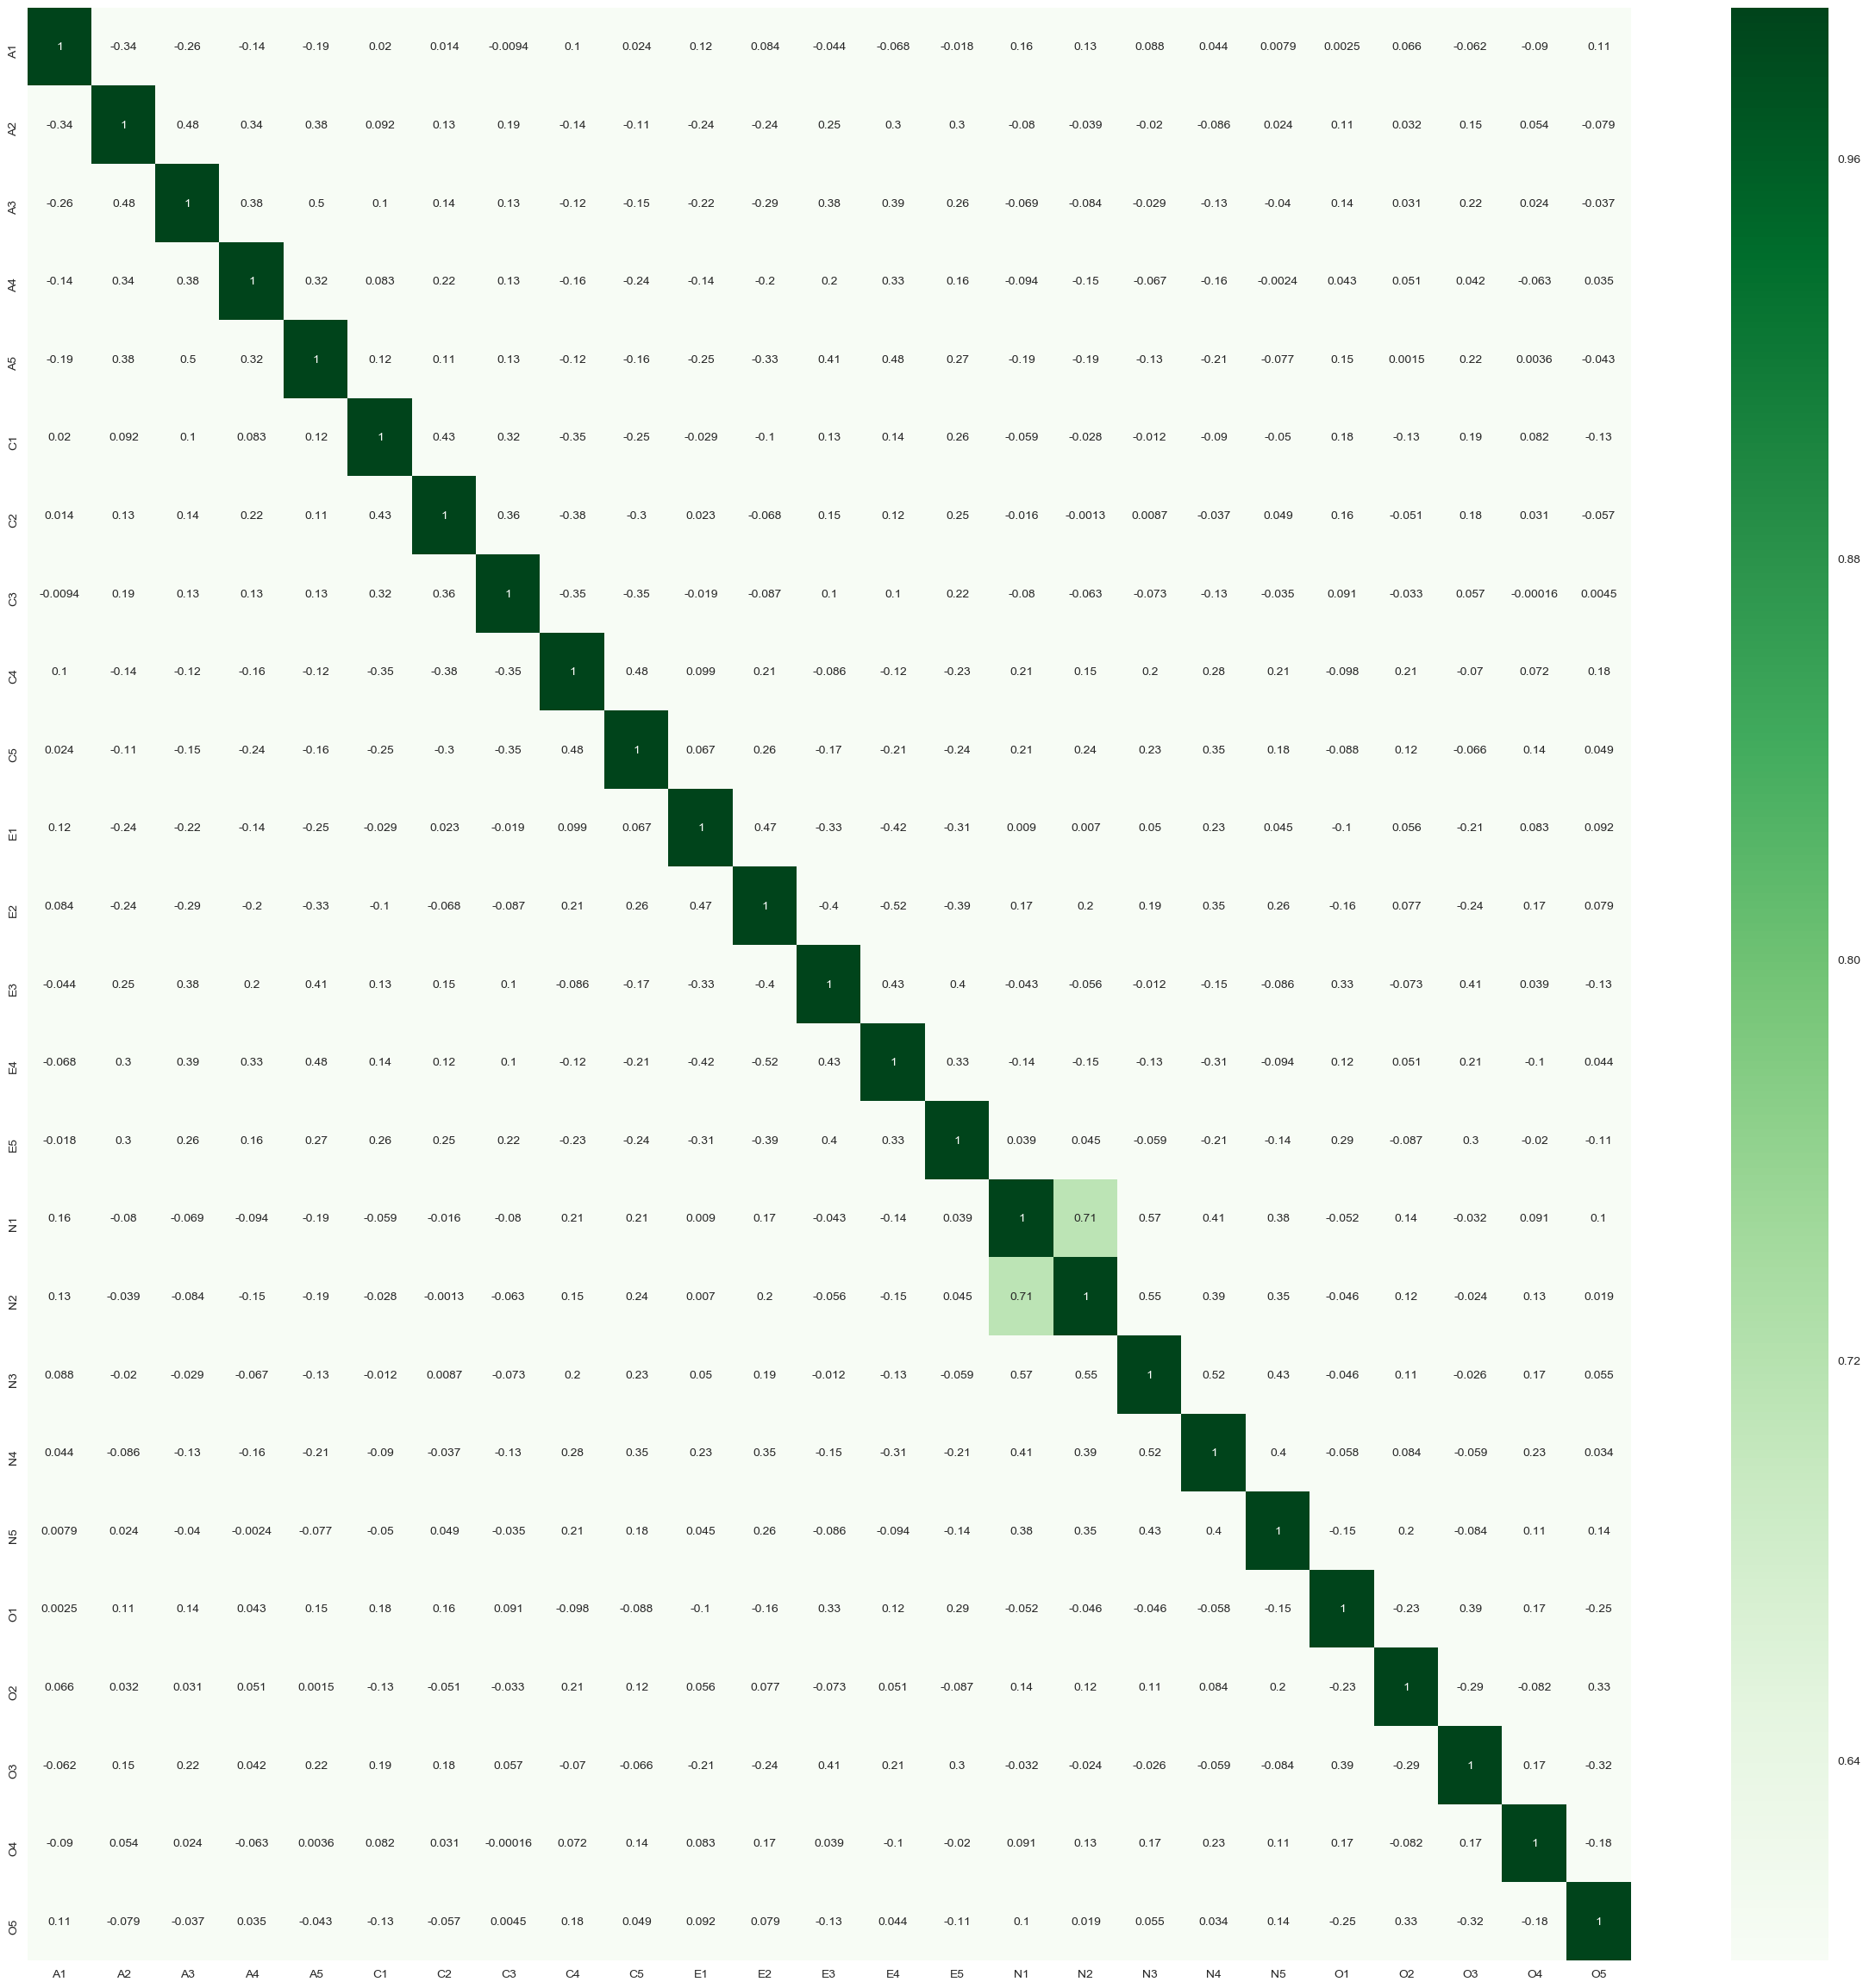

In [89]:
#matriz de correlaciones con heatmap
dfm_p.corr()
plt.figure(figsize=(30,30)) 
sns.heatmap(dfm_p.corr(), cmap='Greens',vmin=0.6, vmax=0.99, annot=True)


In [88]:
dfmc= dfm_p.corr()
dfmc[dfmc>=abs(0.5)]  #Filtro de las columnnas significativas con correlaciones superiores a 0.5 

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3,NaN,NaN,1.000000,NaN,0.502886,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A5,NaN,NaN,0.502886,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se observa que las correlaciones significativas (iguales o superiores a 0.5) solo se dan para algunas preguntas de los items de amabilidad y neuroticismo, que indican que hay colinealidad entre dichas preguntas. No hay correlaciones significativas entre el set de preguntas completo. 

### Desafío 4: Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer-Olkin. 
Comente los resultados.
* Instancie un objeto con **FactorAnalyzer()** donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactorice el objeto con **FactorAnalyzer()** para incluir la cantidad de dimensiones válidas que informó el scree plot.
* Extraiga las cargas del modelo e identifique qué items están asociados a cada factor.
Comente sobre qué significa cada factor construído.

### Aqui se pudrio todo. No funciona FactorAnalyzer

### Desafío 5: Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con kdplot.
* Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

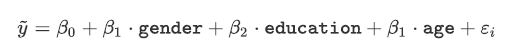